In [1]:
ROOT_DIR = "/home/user/Documents/projects/Metaworld"
%env MUJOCO_GL=egl


import sys
sys.path.append(ROOT_DIR)

import os
import functools
import json
from tqdm import tqdm
import importlib

# scientific
import cv2
import numpy as np

# gym
# from gym.spaces import Box
import mujoco
import metaworld
from metaworld import MT1

# plotting
from PIL import Image
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from lightglue import viz2d

# project imports
# from metaworld.envs.mujoco.sawyer_xyz.test_scripted_policies import ALL_ENVS, test_cases_latest_nonoise
# import reset_space
import utils.camera_utils_v2 as cu
import keyframes.env_utils as env_utils
import keyframes.env_renderer as env_renderer
import keyframes.mujoco_utils as mujoco_utils

env: MUJOCO_GL=egl


In [2]:
importlib.reload(env_renderer)
importlib.reload(mujoco_utils)


<module 'keyframes.mujoco_utils' from '/home/user/Documents/projects/Metaworld/keyframes/mujoco_utils.py'>

In [25]:
# setup env
env_index = 1
env_name = MT1.ENV_NAMES[env_index]
env_scripted_policy = env_utils.policies[env_name]
mt1 = MT1(env_name)
env = mt1.train_classes[env_name]()

env._partially_observable = False
env._freeze_rand_vec = False
env._set_task_called = True

env.reset_model()
env.reset()
print(env_name, env._get_pos_objects())

# renderer
renderer = env_renderer.EnvRenderer(env, camera_name="corner2", height=480, width=360)
#env.model.camera("keyframes").quat = [1,0.17,0,0]


basketball-v2 [0.05736731 0.61288621 0.02987215]


In [26]:
root_node, node_map = mujoco_utils.build_mj_tree(env.model)
name2node = {}
for node in node_map.values():
    name2node[node.name] = node
# mujoco_utils.visualize_mj_tree(root_node)
mujoco_utils.toggle_sites_visibility(env.model, False)
siteSet = set(mujoco_utils.get_site_names(env.model))
if "goal" in siteSet:
    env.model.site("goal").rgba = [0,0,1,1]
# env.model.body("puck_goal").rgba = [0,0,1,1]

# TODO replace 3 with "base"
mujoco_utils.toggle_visibility(env.model, name2node["base"], True)
render_data = renderer.render(depth=True, segmentation=True)

In [11]:
render_data["img"].shape

(240, 320, 3)

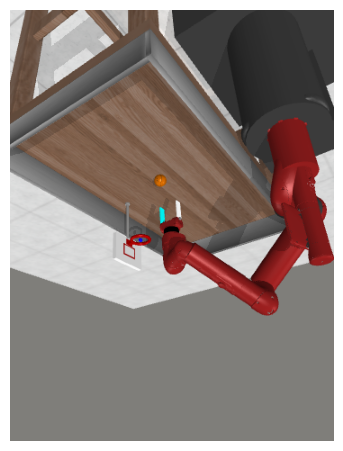

In [27]:
viz2d.plot_images([render_data["img"]])

In [5]:
print(env.model.body("bsktball").pos, env.data.body("bsktball").xpos)

KeyError: "Invalid name 'bsktball'. Valid names: ['RetainingWall', 'backboardlink', 'base', 'basket_goal', 'basketball', 'basketballhoop', 'controller_box', 'hand', 'head', 'head_camera', 'hooplink', 'leftclaw', 'leftpad', 'mocap', 'pedestal', 'pedestal_feet', 'right_arm_base_link', 'right_arm_itb', 'right_hand', 'right_hand_camera', 'right_l0', 'right_l1', 'right_l1_2', 'right_l2', 'right_l2_2', 'right_l3', 'right_l4', 'right_l4_2', 'right_l5', 'right_l6', 'right_torso_itb', 'right_wrist', 'rightclaw', 'rightpad', 'screen', 'tablelink', 'torso', 'world']"

[-0.05574593  0.67717454  0.03      ] [0.07517711 0.81164959 0.25      ] [0.07517711 0.86164959 0.        ] [-0.05574593  0.07717454 -0.19012784] [-0.05574593  0.07717454 -0.19012784]
[-0.05574593  0.67717454  0.03      ] [0.07517711 0.81164959 0.25      ] [0.07517711 0.86164959 0.        ] [0.07517711 0.21164959 0.02987216] [0.07517711 0.21164959 0.02987216]


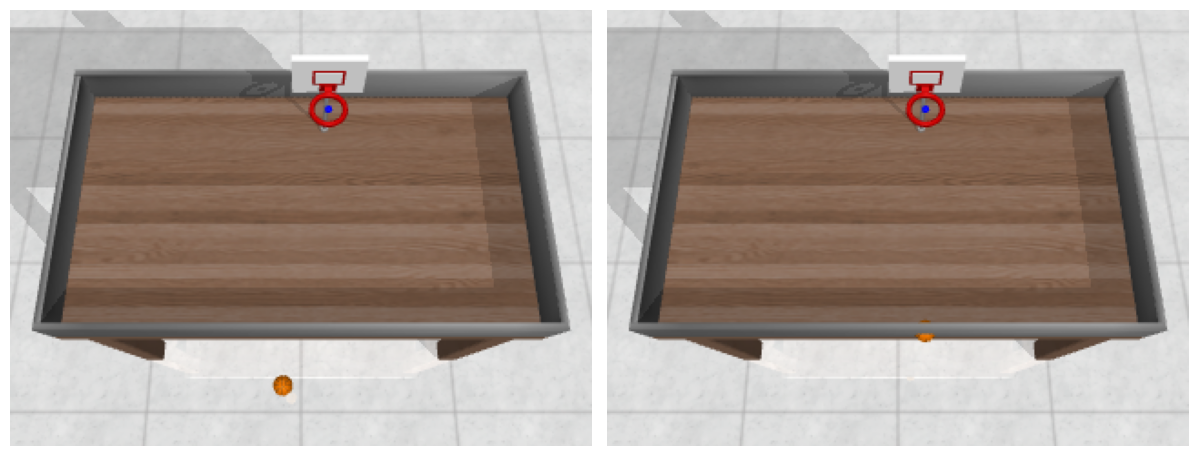

In [6]:
env.reset()
# env.model.site("goal").pos = [0.1,0,0]
# mujoco.mj_forward(env.model, env.data)
# env.model.joint("window_slide").qpos0 = -0.2

env.go_to_step(0)
# env.model.joint("knob_Joint_1").qpos0 = 0.0
#env.model.joint("goal_slidey").qpos0 = 0.03

# env.model.joint("goal_slidey").qpos0 = 0.02

render_data_1 = renderer.render(depth=True, segmentation=True)

print(env.obj_init_pos, env._target_pos, env._basket_pos, env.model.body("basketball").pos, env.data.body("basketball").xpos)

# move object to target pos
"""
self.obj_init_pos = goal_pos[:3]
self._target_pos = goal_pos[-3:]
peg_pos = self._target_pos - np.array([0.0, 0.0, 0.05])
self._set_obj_xyz(self.obj_init_pos)
"""
# env._set_obj_xyz(np.array(-np.pi/2))
# env._set_obj_xyz(np.array([0.1, 0.8, 0.2]))
# env._set_obj_xyz(env._target_pos)
# env.model.joint("window_slide").qpos0 = 0.0
env.go_to_step(1)

# env.model.body("basketball").pos = [0,-0.6,-0.0]
# env.model.joint("knob_Joint_1").qpos0 = np.pi / 2

# env.model.joint("goal_slidey").qpos0 = 0.0
# env._set_obj_xyz([0.3,0.3,0.3])

render_data_2 = renderer.render(depth=True, segmentation=True)

print(env.obj_init_pos, env._target_pos, env._basket_pos, env.model.body("basketball").pos, env.data.body("basketball").xpos)


# visualize images
viz2d.plot_images([render_data_1["img"], render_data_2["img"]])

[0.0853569  0.65222039 0.03      ] [0.0140759  0.81796736 0.25      ] [0.0140759  0.86796736 0.        ] [ 0.0853569   0.05222039 -0.19012784] [ 0.0853569   0.65222039 -0.19012784] [0.   0.6  0.03] [1.40201540e-16 6.00000000e-01 3.19930492e-09]
[0.0853569  0.65222039 0.03      ] [0.0140759  0.81796736 0.25      ] [0.0140759  0.86796736 0.        ] [0.0140759  0.21796736 0.02987216] [0.0140759  0.81796736 0.02987216] [0.   0.6  0.03] [1.40201540e-16 6.00000000e-01 3.19930492e-09]


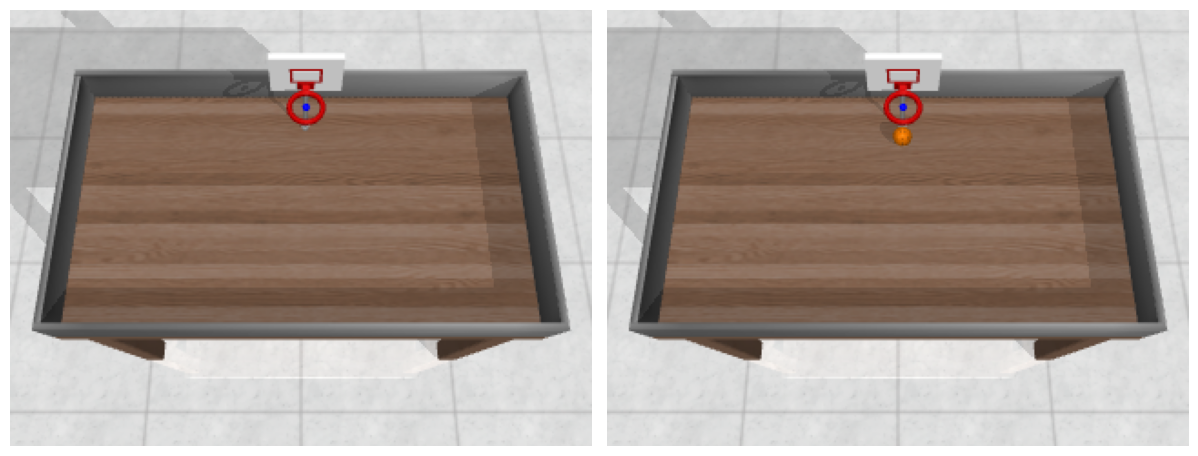

In [14]:
env.reset()
# env.model.site("goal").pos = [0.1,0,0]
# mujoco.mj_forward(env.model, env.data)
# env.model.joint("window_slide").qpos0 = -0.2

env.go_to_step(0)
# env.model.joint("knob_Joint_1").qpos0 = 0.0
#env.model.joint("goal_slidey").qpos0 = 0.03

# env.model.joint("goal_slidey").qpos0 = 0.02

render_data_1 = renderer.render(depth=True, segmentation=True)

print(env.obj_init_pos, env._target_pos, env._basket_pos, env.model.body("basketball").pos, env.data.body("basketball").xpos, env.model.body("bsktball").pos, env.data.body("bsktball").xpos)

# move object to target pos
"""
self.obj_init_pos = goal_pos[:3]
self._target_pos = goal_pos[-3:]
peg_pos = self._target_pos - np.array([0.0, 0.0, 0.05])
self._set_obj_xyz(self.obj_init_pos)
"""
# env._set_obj_xyz(np.array(-np.pi/2))
# env._set_obj_xyz(np.array([0.1, 0.8, 0.2]))
# env._set_obj_xyz(env._target_pos)
# env.model.joint("window_slide").qpos0 = 0.0
env.go_to_step(1)

# env.model.body("basketball").pos = [0,-0.6,-0.0]
# env.model.joint("knob_Joint_1").qpos0 = np.pi / 2

# env.model.joint("goal_slidey").qpos0 = 0.0
# env._set_obj_xyz([0.3,0.3,0.3])

render_data_2 = renderer.render(depth=True, segmentation=True)

print(env.obj_init_pos, env._target_pos, env._basket_pos, env.model.body("basketball").pos, env.data.body("basketball").xpos, env.model.body("bsktball").pos, env.data.body("bsktball").xpos)


# visualize images
viz2d.plot_images([render_data_1["img"], render_data_2["img"]])

In [19]:
-0.19012784 - 0.03

-0.22012784

In [20]:
0.02987216 - 0.25

-0.22012784

In [ ]:


render_data_2 = renderer.render(depth=True, segmentation=True)

print(env.obj_init_pos, env._target_pos, env._basket_pos)


# visualize images
viz2d.plot_images([render_data_1["img"], render_data_2["img"]])

In [13]:
np.sum(render_data_1["img"] - render_data_2["img"])

11887

In [14]:
env.model.joint("window_slide")

<_MjModelJointViews
  M0: array([0.6387869])
  Madr: array([44], dtype=int32)
  armature: array([0.001])
  axis: array([1., 0., 0.])
  bodyid: array([35], dtype=int32)
  damping: array([2.])
  dofadr: array([9], dtype=int32)
  frictionloss: array([0.])
  group: array([0], dtype=int32)
  id: 9
  invweight0: array([1.5654673])
  jntid: array([9], dtype=int32)
  limited: array([1], dtype=uint8)
  margin: array([0.])
  name: 'window_slide'
  parentid: array([-1], dtype=int32)
  pos: array([0.1, 0.1, 0.1])
  qpos0: array([0.])
  qpos_spring: array([0.])
  qposadr: array([9], dtype=int32)
  range: array([0. , 0.2])
  simplenum: array([0], dtype=int32)
  solimp: array([[2.0e+00, 9.0e-01, 9.5e-01, 1.0e-03, 5.0e-01]])
  solref: array([[1.  , 0.02]])
  stiffness: array([0.])
  type: array([2], dtype=int32)
  user: array([], dtype=float64)
>

In [44]:
env.model.joint("doorjoint")

KeyError: "Invalid name 'doorjoint'. Valid names: ['l_close', 'r_close', 'right_j0', 'right_j1', 'right_j2', 'right_j3', 'right_j4', 'right_j5', 'right_j6']"

0 world
| 1 tablelink
| 2 RetainingWall
| 3 base
| | 4 controller_box
| | 5 pedestal_feet
| | 6 torso
| | 7 pedestal
| | 8 right_arm_base_link
| | | 9 right_l0
| | | | 10 head
| | | | | 11 screen
| | | | | 12 head_camera
| | | | 13 right_torso_itb
| | | | 14 right_l1
| | | | | 15 right_l2
| | | | | | 16 right_l3
| | | | | | | 17 right_l4
| | | | | | | | 18 right_arm_itb
| | | | | | | | 19 right_l5
| | | | | | | | | 20 right_hand_camera
| | | | | | | | | 21 right_wrist
| | | | | | | | | 22 right_l6
| | | | | | | | | | 23 right_hand
| | | | | | | | | | | 24 hand
| | | | | | | | | | | | 25 rightclaw
| | | | | | | | | | | | | 26 rightpad
| | | | | | | | | | | | 27 leftclaw
| | | | | | | | | | | | | 28 leftpad
| | | | | | | | 29 right_l4_2
| | | | | | 30 right_l2_2
| | | | | 31 right_l1_2
| 32 mocap
| 33 RoundNut
| | 34 asmbly_peg
| 35 peg


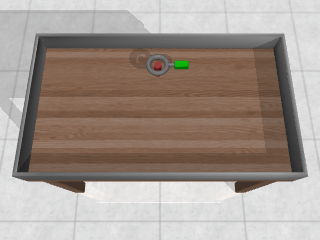

In [ ]:
env._partially_observable = False
env._freeze_rand_vec = False
env._set_task_called = True
# env._random_reset_space = reset_space.get_custom_random_reset_space(env_name)
generate_trajectories(env, policy, env_name, start_index=start_index)

In [ ]:
def generate_trajectories(env, policy, tag, res=(224, 224), depth_res=64, num_trajectories=50, start_index=0, flip=False, random_hand_init_pos=True):

    folder = f'./trajectories-v5'
    if not os.path.exists(folder):
        os.makedirs(folder)
    
    cameras = ['corner3'] # exclude 'gripperPOV' because it is hard to determine next step if we can't observe the whole environment

    pixels_x, pixels_y = np.meshgrid(np.linspace(0, depth_res - 1, depth_res), np.linspace(0, depth_res - 1, depth_res))
    pixels_x = pixels_x.reshape(1,depth_res,depth_res) + 0.5 # add 0.5 to center point
    pixels_y = depth_res - pixels_y.reshape(1,depth_res,depth_res) - 0.5 # add 0.5 to center point

    for camera in cameras:
        for i in range(start_index, num_trajectories + start_index):
            # repeat if env.max_path_length is reached without success
            success = False
            while not success:
                # set initial hand position
                if random_hand_init_pos:
                    env.hand_init_pos = reset_space.get_random_hand_init_pos()

                env.reset()
                env.reset_model()
                o = env.reset()

                # Made training worse.. fix later
                # if env._random_reset_space.low.shape[0] > 3:
                #     env.hand_init_pos = reset_space.sample_hand_pos_around_object(env.obj_init_pos)
                #     env._reset_hand()
                
                actions = []
                rewards = []
                observations = []
                images = []
                infos = []
                points_world_frames = []
                n_timesteps = 0
                for _ in range(min(300, env.max_path_length)):
                    # TODO we should render env before taking action
                    n_timesteps += 1
                    a = policy.get_action(o)
                    # TODO done is always False for scripted policies??
                    try:
                        o, r, done, info = env.step(a)
                    except:
                        break
                    # Camera is one of ['corner', 'topview', 'behindGripper', 'gripperPOV']
                    img = env.sim.render(*res, mode='offscreen', camera_name=camera)[:,:,::-1]
                    _, depth = env.sim.render(depth_res, depth_res, mode='offscreen', camera_name=camera, depth=True)
                    depth = cu.get_real_depth_map(env.sim, depth)

                    # get points in world frame
                    T_world2pixel = cu.get_camera_transform_matrix(env.sim, "corner3", depth_res, depth_res)
                    T_pixel2world = np.linalg.inv(T_world2pixel)
                    pixels_z = depth.reshape(1,depth_res,depth_res)
                    pixels = np.vstack((pixels_x * pixels_z, pixels_y * pixels_z, pixels_z, np.ones_like(pixels_z)))
                    pixels = pixels.reshape(4, -1)
                    points_world = np.matmul(T_pixel2world, pixels)[:3]
                    points_world_frames.append(points_world)

                    # if flip: img = cv2.rotate(img, cv2.ROTATE_180)
                    actions.append(a)
                    rewards.append(r)
                    observations.append(o)
                    images.append(img)
                    # NOTE we cannot encode np.bool_ as json
                    info["grasp_success"] = 1.0 if info["grasp_success"] else 0.0
                    infos.append(json.dumps(info))
                    if info["success"]:
                        success = True
                        break
                if success:
                    np.savez_compressed(
                        f'{folder}/{tag}_{res[0]}x{res[1]}_{camera}_{i}_{n_timesteps}.npz',
                        actions=np.array(actions),
                        rewards=np.array(rewards),
                        observations=np.array(observations),
                        images=np.array(images),
                        # isDone=np.array(isDone),
                        infos=np.array(infos),
                        points_world_frames=np.array(points_world_frames)
                    )